In [75]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/aremath/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random', 'arrow']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [76]:
# Gross
import sys
sys.path.append("..")

In [77]:
from PIL import Image

In [78]:
import random
from world_rando import generate
from world_rando.coord import Coord
from world_rando.settings import Region
from world_rando.settings import tiny_settings as s
from rom_tools.rom_manager import RomManager, region_map_locs
from rom_tools import rom_data_structures
from world_rando.room_dtypes import convert_rooms
from rom_tools.address import Address
from encoding import free_space
from world_rando import map_viz

In [79]:
from world_rando.settings import global_settings_t, amap_settings_t, cmap_settings_t, room_settings_t, WorldGenSettings

In [80]:
#TODO: how to do this relative stuff more easily?
amap_settings_t["node_ordering"] = "../encoding/dsl/item_order_small.txt"
amap_settings_t["region_ordering"] = "../encoding/dsl/region_order.txt"
room_settings_t["patterns"] = "../encoding/patterns"
output_settings_t = {
    "output": "../output",
    "map_tiles": "../encoding/map_tiles",
    "room_tiles": "../encoding/room_tiles"
}

In [81]:
s_t = WorldGenSettings(global_settings_t, amap_settings_t, cmap_settings_t, room_settings_t, output_settings_t)

In [82]:
#TODO: allow WorldGenSettings to take the relative path (in this case ../) as a parameter
s = WorldGenSettings()
s.abstract_map_settings["node_ordering"] = "../encoding/dsl/item_order.txt"
s.abstract_map_settings["region_ordering"] = "../encoding/dsl/region_order.txt"
# Don't need to sett patterns since we are not running the room gen
s.output_settings = output_settings_t

In [83]:
#s = s_t

In [86]:
#TODO - Orderedsetify everything? some behavior seems to be changing by restarting
random.seed(0)
abstract_map_info = generate.generate_abstract_map(s)
generate.visualize_abstract_maps(s, abstract_map_info)
concrete_map_info = generate.generate_concrete_map(s, abstract_map_info)
generate.visualize_concrete_maps(s.output_settings, concrete_map_info)
generate.print_stats(concrete_map_info[-1])

['Bomb_Torizo', 'HJ', 'Spore_Spawn', 'MB', 'B', 'V', 'Spazer', 'E', 'CB', 'GS', 'RT', 'WB', 'SA', 'G', 'SJ', 'M', 'Crocomire', 'SPB', 'Kraid', 'IB', 'Phantoon', 'Ridley', 'Draygon', 'SB', 'XR', 'S', 'Botwoon', 'PB', 'Golden_Torizo', 'Mother_Brain', 'PLB']
Generating map for Region(Wrecked_Ship)
Generating map for Region(Maridia)
Generating map for Region(Crateria)
Generating map for Region(Norfair)
Generating map for Region(Brinstar)
Generating map for Region(Tourian)
Tiles: 953
Average room size: 2.9893617021276597
Average path length: 11.322429906542055


In [87]:
crateria = Region("Crateria")

In [88]:
graph = abstract_map_info[2][crateria]

In [89]:
#graph

In [90]:
cmap = concrete_map_info[0][crateria]
node_info = concrete_map_info[3][crateria]

In [91]:
#node_info

In [92]:
xs, ys = zip(*[v[0] for v in node_info.values()])

In [93]:
max_ntimes = 0
for node in graph.nodes:
    for neighbor in graph.neighbors(node):
        ntimes = len(graph.get_edge_data(node, neighbor))
        if ntimes > max_ntimes:
            max_ntimes = ntimes
assert max_ntimes != 0

In [94]:
max_ntimes

2

In [95]:
# Load the map image
map_image = Image.open("../output/Crateria/cmap.png")

In [96]:
mx, my = map_image.size

In [97]:
map_image = map_image.resize((2*mx, 2*my), Image.Resampling.NEAREST)

In [98]:
map_image = np.asarray(map_image)

In [99]:
def node_pos_transform(node_pos):
    return node_pos.scale(32) + Coord(15,15)

In [100]:
new_node_pos = {k: node_pos_transform(v[0]) for k,v in node_info.items()}

In [101]:
xs, ys = list(zip(*[v for v in new_node_pos.values()]))
#xs = list(xs)
#ys = list(ys)
#for i in range(len(xs)):
#    xs[i] = xs[i] + 7
#    ys[i] = ys[i] + 7

In [102]:
#plt.figure(figsize((mx * 2) / 96, (my * 2) / 96))
#plt.imshow(map_image)

In [103]:
from matplotlib import patheffects

/tmp/ipykernel_223571/2188294869.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize((mx * 2) / 96, (my * 2) / 96), facecolor="black")


<Figure size 1800x1000 with 0 Axes>

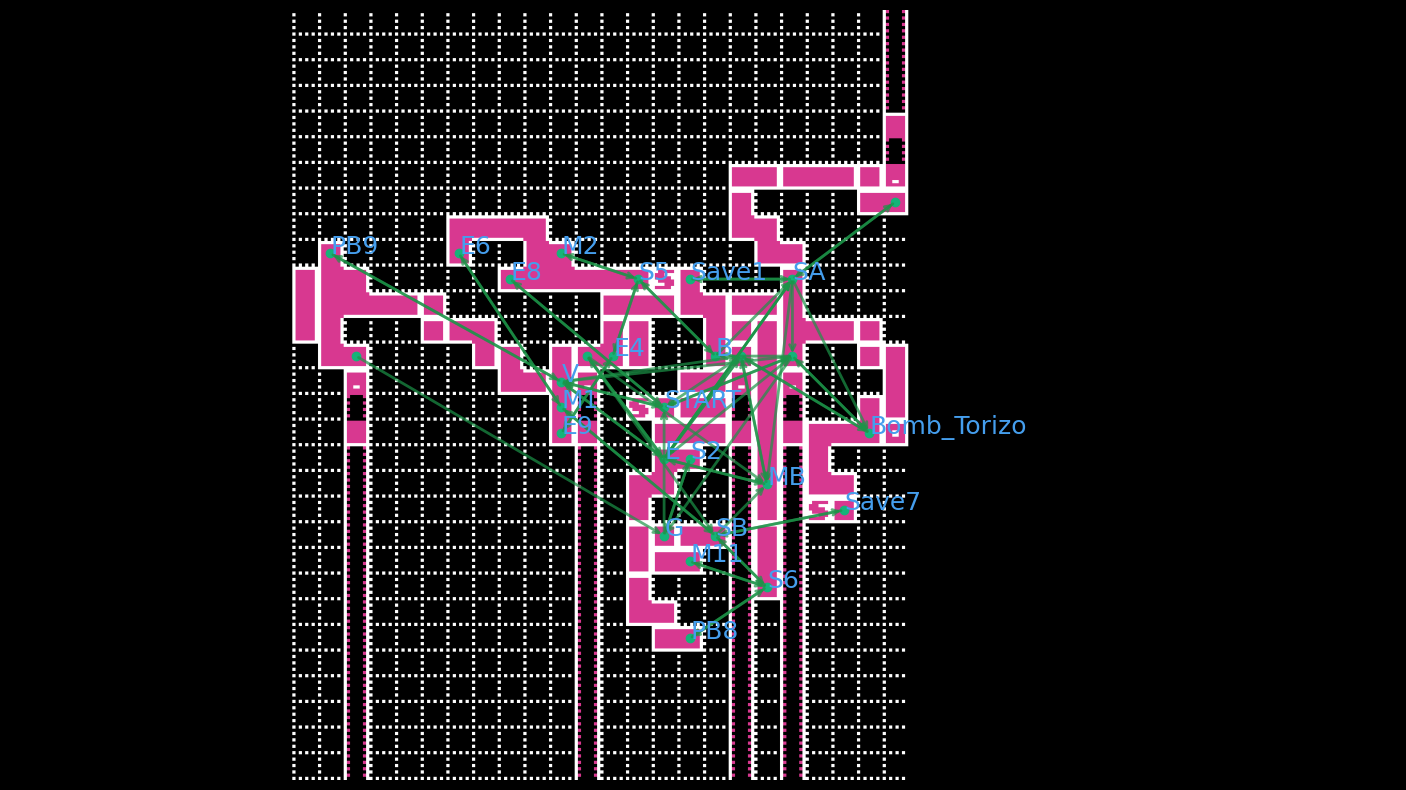

<Figure size 1800x1000 with 0 Axes>

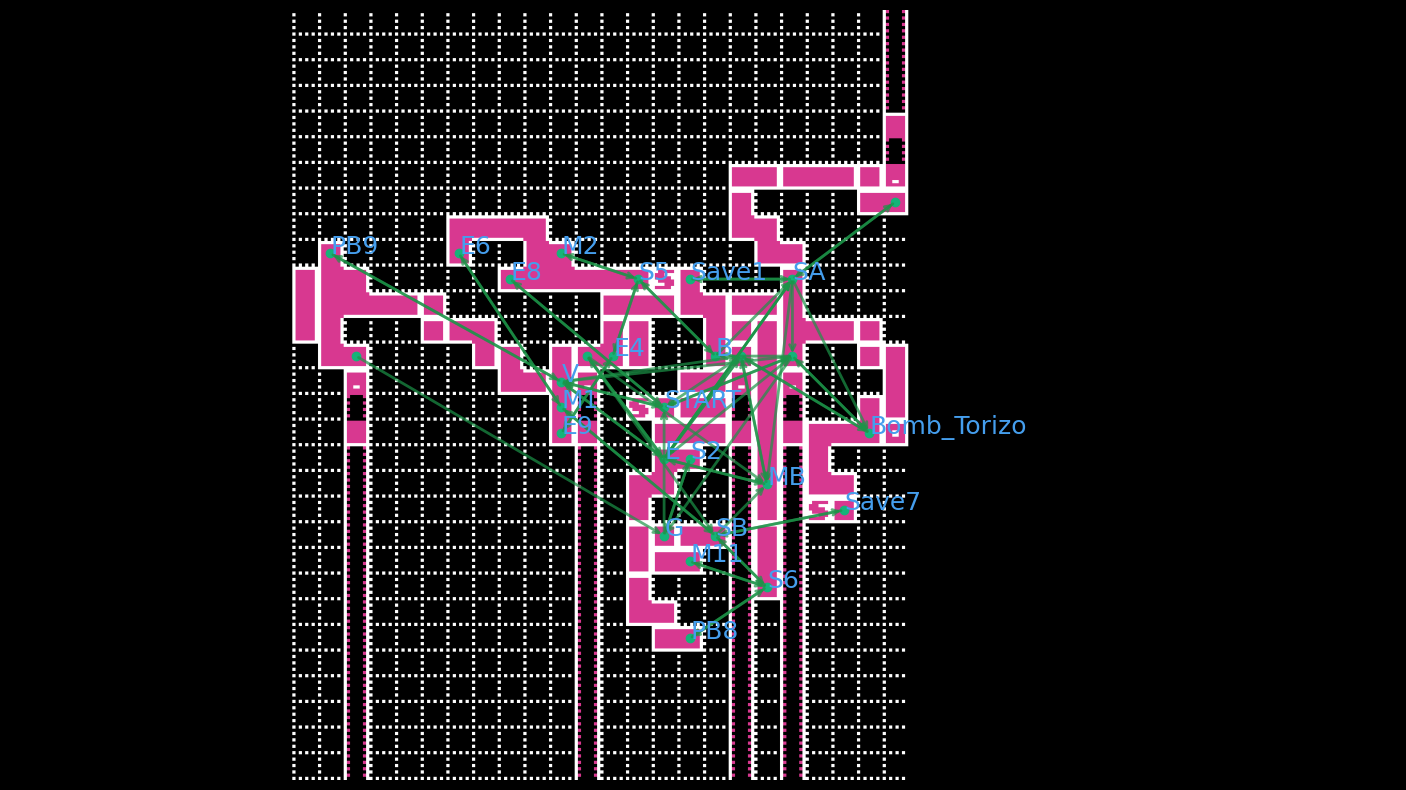

<Figure size 1800x1000 with 0 Axes>

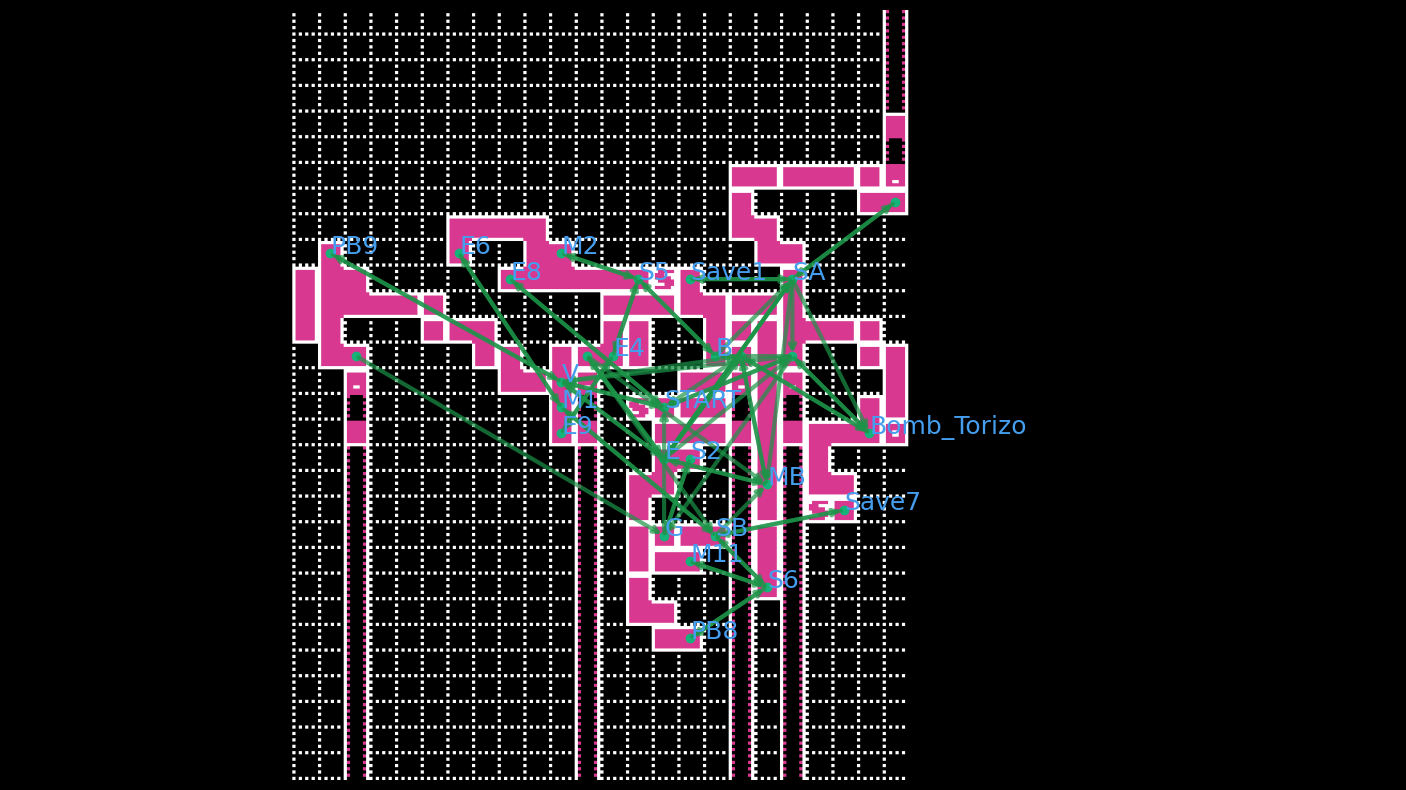

<Figure size 1800x1000 with 0 Axes>

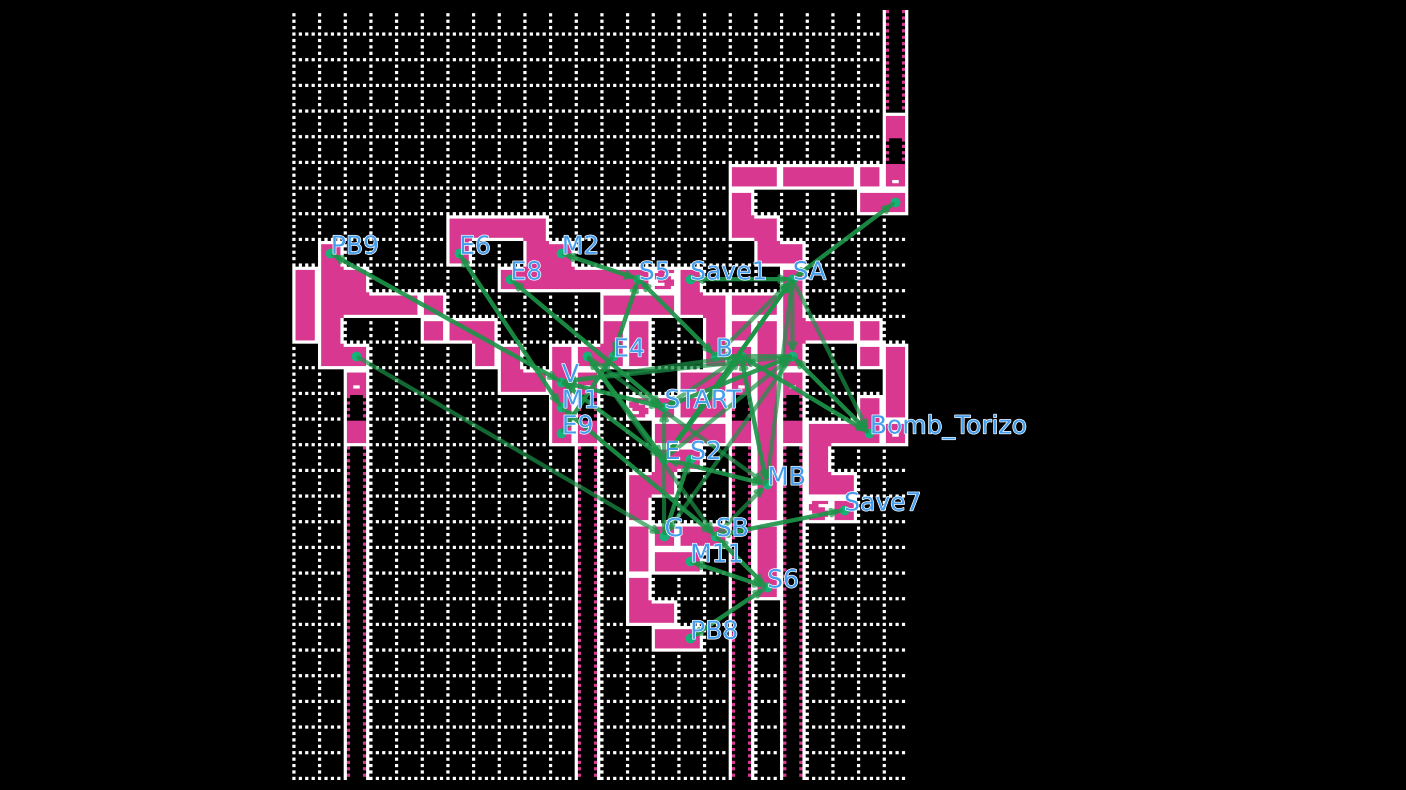

<Figure size 1800x1000 with 0 Axes>

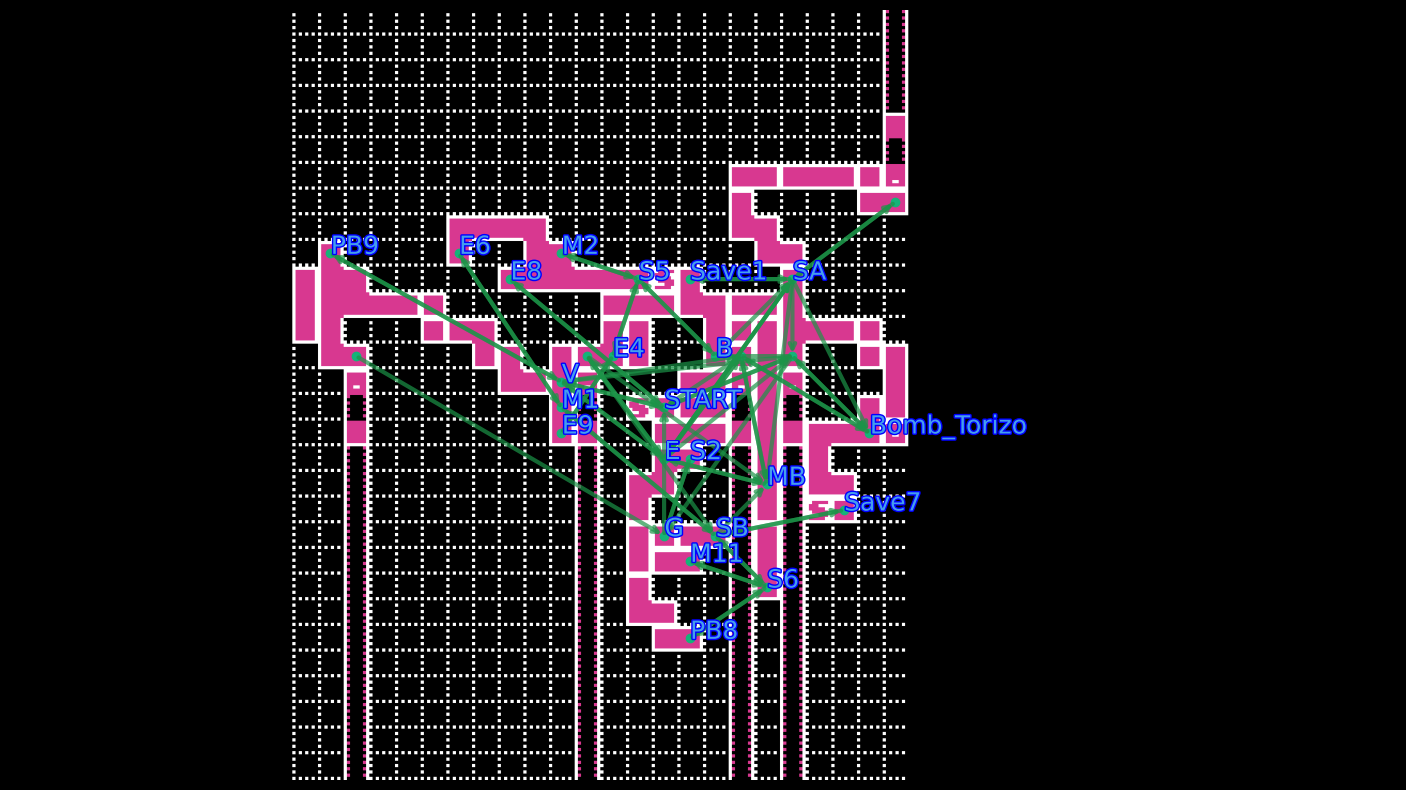

<Figure size 1800x1000 with 0 Axes>

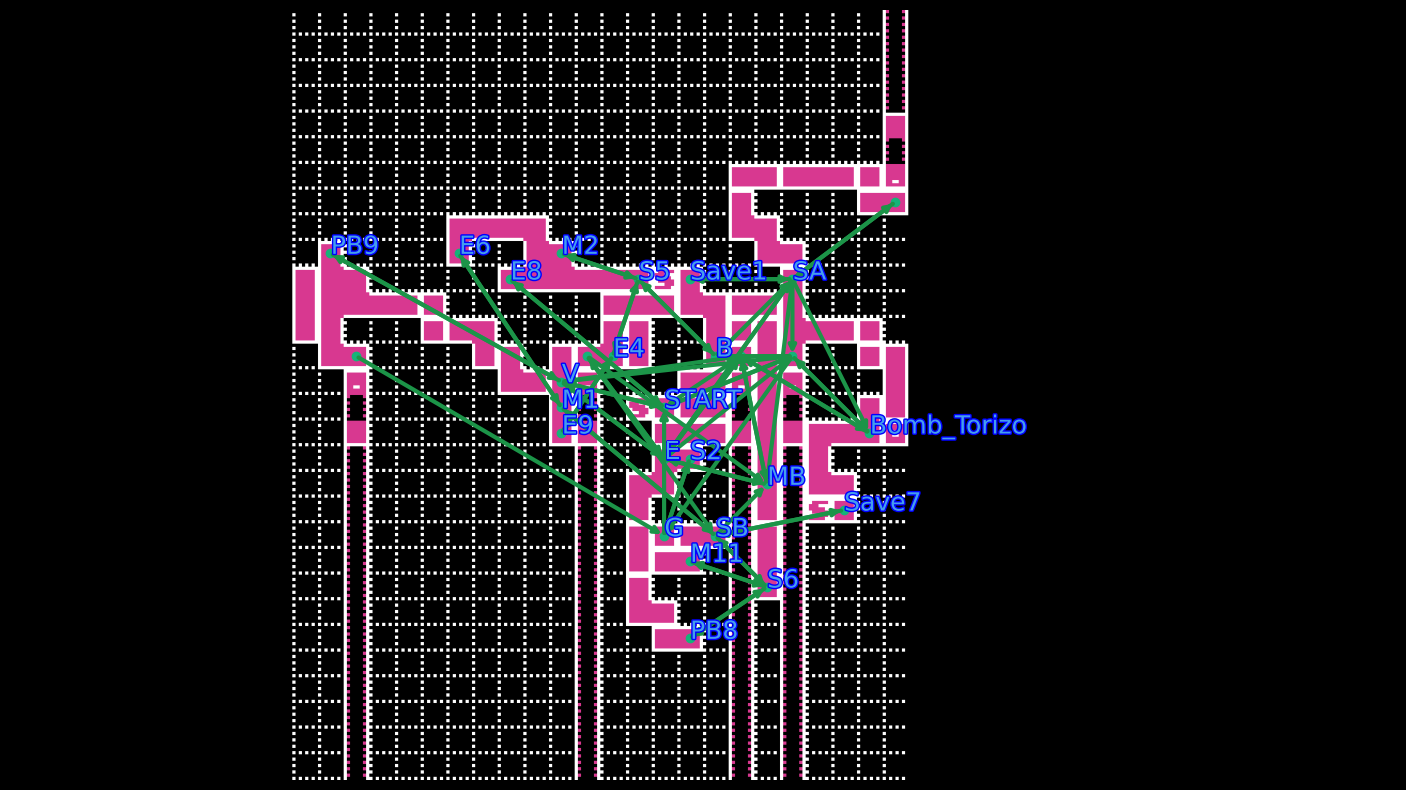

<Figure size 1800x1000 with 0 Axes>

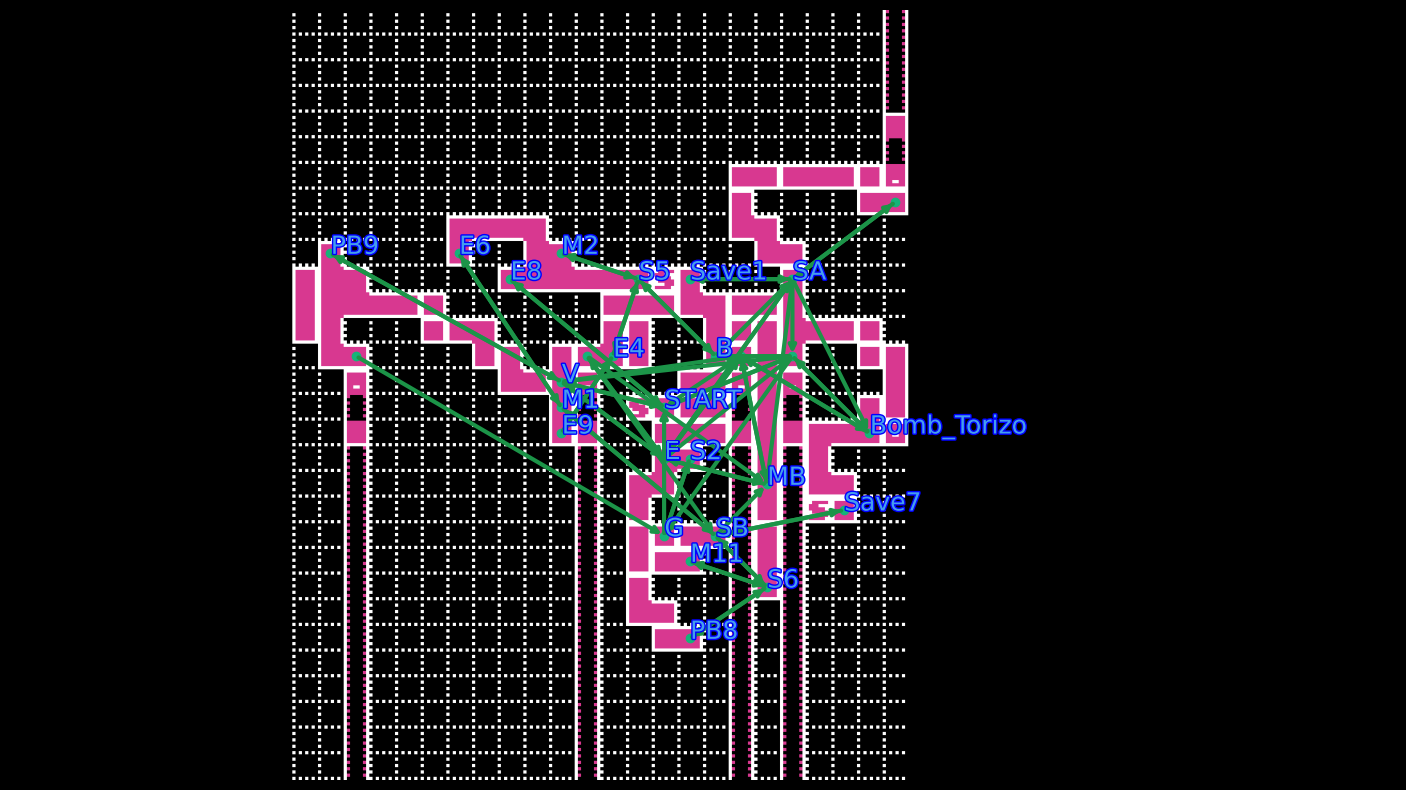

<Figure size 1800x1000 with 0 Axes>

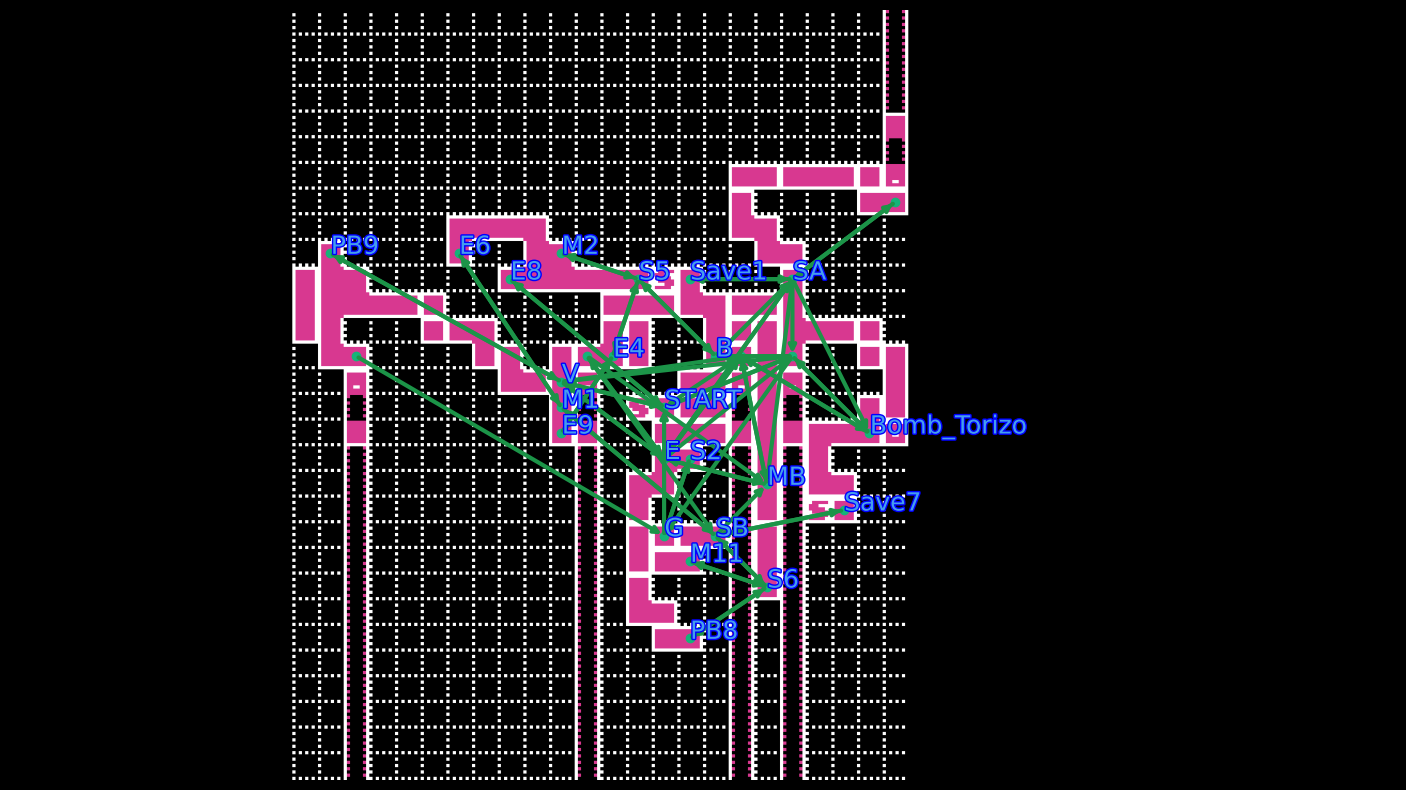

<Figure size 766.667x766.667 with 0 Axes>

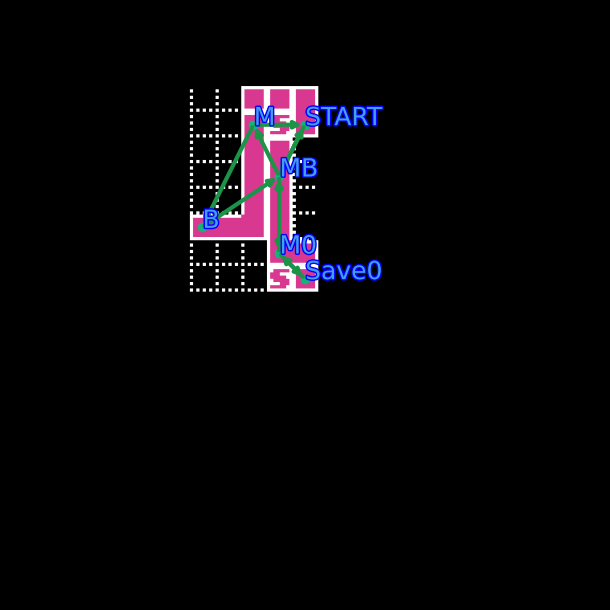

<Figure size 766.667x766.667 with 0 Axes>

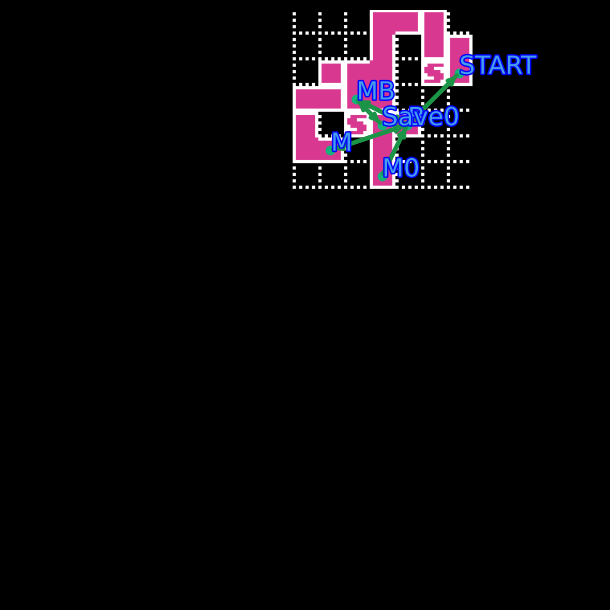

<Figure size 1800x1000 with 0 Axes>

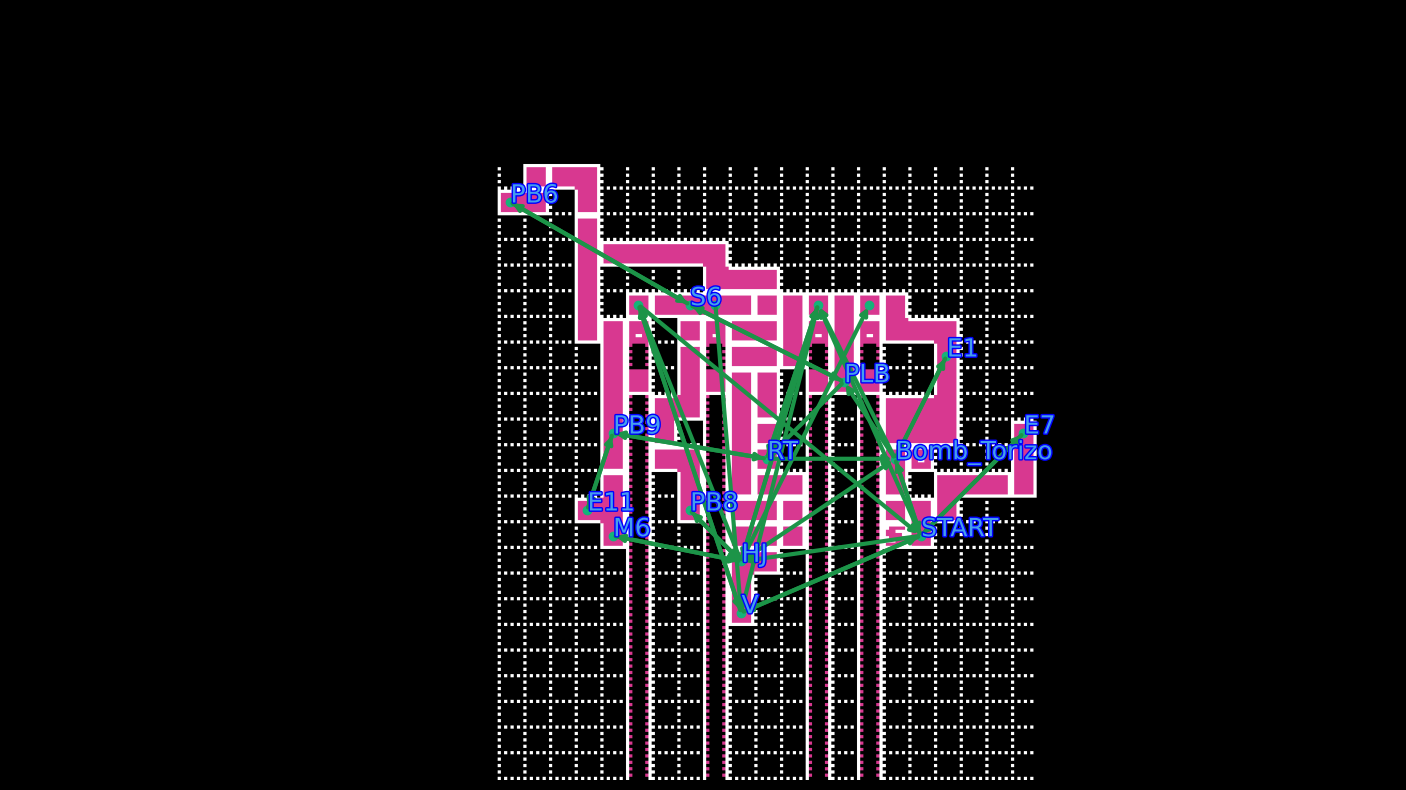

In [104]:
plt.figure(figsize((mx * 2) / 96, (my * 2) / 96), facecolor="black")
plt.style.use("dark_background")
fig, ax = plt.subplots()
ax.set_facecolor("black")
plt.imshow(map_image)
plt.axis("off")
#plt.gca().invert_yaxis()
# Plot the node points
ax.scatter(xs, ys, color="#15b379")
# Plot the graph connections
for node in graph.nodes:
    node_x, node_y = new_node_pos[node]
    for neighbor in graph.neighbors(node):
        neighb_x, neighb_y = new_node_pos[neighbor]
        ntimes = len(graph.get_edge_data(node, neighbor))
        #plt.plot([node_x, neighb_x], [node_y, neighb_y], color="black", alpha= (ntimes / max_ntimes))
        #plt.arrow(node_x, node_y, neighb_x - node_x, neighb_y - node_y, color="black", alpha= (ntimes / max_ntimes))
        #ax.annotate("", xytext=(neighb_x, neighb_y), xy=(node_x, node_y),
        #    arrowprops=dict(arrowstyle="->", color="white", alpha = (ntimes / (max_ntimes))))
        #alpha = max(0.7, ntimes / (max_ntimes))
        alpha=1
        arrow = ax.annotate("", xytext=(neighb_x, neighb_y), xy=(node_x, node_y),
            arrowprops=dict(arrowstyle="->", color="#1c9448", alpha=alpha, lw=3))
        #arrow.set_path_effects([patheffects.withStroke(linewidth=2, foreground="g")])
# Plot the node labels
for i,k in enumerate(node_info.keys()):
    if len(k) < 15:
        txt = ax.annotate(k, (xs[i] + 0.5, ys[i] + 0.5), color="#459eed", fontsize=18)
        txt.set_path_effects([patheffects.withStroke(linewidth=2, foreground="b")])
plt.savefig("foo.png")

In [30]:
# Debugging the force-directed spring model

In [398]:
from ipycanvas import Canvas, hold_canvas
import time
from world_rando.item_order_graph import NodeType
from world_rando.map_gen import random_node_place

In [399]:
#canvas = Canvas(width=200, height=200)
#canvas.fill_rect(25, 25, 100, 100)
#canvas

In [400]:
#for i in range(10):
#    canvas.fill_rect(25 + i*10, 25 + i*10, 25, 25)
#    time.sleep(1)

In [401]:
# Tiny setting
random.seed(0)
abstract_map_info_t = generate.generate_abstract_map(s_t)

['B', 'MB', 'M']


In [402]:
graph_t = abstract_map_info_t[2][crateria]

In [403]:
up_es = set([n for n in graph_t.nodes if graph_t.nodes[n].data == NodeType.ELEVATOR_UP])
down_es = set([n for n in graph_t.nodes if graph_t.nodes[n].data == NodeType.ELEVATOR_DOWN])

In [404]:
dim = s_t.concrete_map_settings["region_sizes"]["Crateria"]
dim

c(54,30)

In [405]:
node_locs = random_node_place(graph_t, dim, up_es, down_es)

In [406]:
scale_factor = 16

In [408]:
canvas = Canvas(width = dim.x * scale_factor, height = dim.y * scale_factor)
canvas

Canvas(height=480, width=864)

In [409]:
# IPyCanvas uses both int colors and string HTML #colors
def convert_hex(int_h):
    # Should be a 6-character hex int, so align and pad to 6 characters
    return f"#{hex(int_h)[2:]:0>6}"

def draw_embedding(graph, embedding, color):
    # Draw everything at once for efficiency
    with hold_canvas():
        canvas.fill_style = convert_hex(color)
        canvas.stroke_style = convert_hex(color)
        # Draw the nodes
        xs = []
        ys = []
        for k,v in embedding.items():
            vv = v.scale(scale_factor)
            xs.append(vv.x)
            ys.append(vv.y)
        canvas.fill_circles(xs, ys, 5)
        # Draw the edges
        # First, compute the list of edges
        edges = []
        for node in graph.nodes:
            start = embedding[node].scale(scale_factor)
            for  neighbor in graph.neighbors(node):
                edges.append((start, embedding[neighbor].scale(scale_factor)))
        # Convert to numpy
        #a = np.zeros([len(edges), 2, 2])
        a = np.array(edges)
        #for i,e in enumerate(edges):
        #    for j,p in enumerate(e):
        #        for k, q in enumerate(p):
        #            a[i,j,k] = q * 16
        canvas.stroke_styled_line_segments(a, color=color)
    return

def draw_embedding_delta(graph, e1, e2):
    canvas.clear()
    # Blue for previous
    draw_embedding(graph, e1, color=0x0000ff)
    # Red for next
    draw_embedding(graph, e2, color=0xff0000)
    # Draw lines between corresponding points
    edges = []
    for k in e1.keys():
        edges.append((e1[k].scale(scale_factor), e2[k].scale(scale_factor)))
    a = np.array(edges)
    canvas.stroke_style = convert_hex(0xffffff)
    canvas.stroke_styled_line_segments(a, color=0xffffff)
    canvas.flush()
    return

In [410]:
node_locs2 = {k: v + Coord(1,1) for k,v in node_locs.items()}

In [411]:
#draw_embedding(graph_t, d, color=0xff0000)
canvas.clear()
draw_embedding_delta(graph_t, node_locs, node_locs2)

In [412]:
delay = 1

In [413]:
from world_rando.concrete_map import euclidean

In [417]:
#TODO - constant "center of mass"?
# i.e. recenter the node_locs after running the model
#TODO: show total potential energy over time
#TODO - spring equilibrium distance depends on the multiplicity of the edge?
#TODO - random distribution of equilibrium distances
# - Distance based on the importance of the item / boss?
#TODO - Some repulsion of nodes (regardless of connectivity)
#TODO - slightly drag down_es down and up_es up
#TODO - support for rigid components like elevators (or components that can only stretch in certain directions)
#TODO - torques for node angles

#TODO: this system conserves energy! That's BAD
def spring_model_old(node_locs, graph, n_iterations, spring_constant, spring_equilibrium, dt, damping):
    """Changes node placement based on a simple spring model.
    Node locs is the dictionary of initial node placements and is edited by the function.
    graph is the graph of how the  nodes are connected to each other
        (i.e. where to place springs).
    n_iterations is how many time steps to run the model for.
        A few should suffice for my purposes.
    spring_constant is the k in -kx.
    spring_equilibrium is the distance where the spring is at rest.
    dt is the time step.
    Returns a lower potential-energy node_locs."""
    # node locs is node_name -> node_position
    # node_name -> node_velocity
    # using mcoords as a vector
    node_v = {n : Coord(0, 0) for n in node_locs}
    # node_name -> node_acceleration
    node_a = {n : Coord(0, 0) for n in node_locs}
    iteration = 0
    while iteration < n_iterations:
        node_locs_new = {k:v for k,v in node_locs.items()}
        for n in node_locs:
            # Update node_v
            for e in graph.nodes[n].edges:
                t = e.terminal
                # The amount of stretching, possibly negative
                x = euclidean(node_locs[n], node_locs[t]) - spring_equilibrium
                # Direction
                n_to_t = (node_locs[t] - node_locs[n]).to_unit()
                #-kx
                node_v[n] = node_v[n] + n_to_t.scale(spring_constant * x * dt)
                node_v[t] = node_v[t] + n_to_t.scale(-spring_constant * x * dt)
            # update node_locs
            node_locs_new[n] = node_locs[n] + node_v[n].scale(dt)
        draw_embedding_delta(graph, node_locs, node_locs_new)
        time.sleep(delay)
        node_locs = node_locs_new
        iteration = iteration + 1
    # resolve to an int
    # TODO: is there a dict map function?
    node_locs = {n: node_locs[n].resolve_int() for n in node_locs}
    return node_locs

def spring_model_new(node_locs, graph, n_iterations, spring_constant, spring_equilibrium, dt, damping):
    """Changes node placement based on a simple spring model.
    Node locs is the dictionary of initial node placements and is edited by the function.
    graph is the graph of how the  nodes are connected to each other
        (i.e. where to place springs).
    n_iterations is how many time steps to run the model for.
        A few should suffice for my purposes.
    spring_constant is the k in -kx.
    spring_equilibrium is the distance where the spring is at rest.
    dt is the time step.
    Returns a lower potential-energy node_locs."""
    # node locs is node_name -> node_position
    # node_name -> node_velocity
    # using mcoords as a vector
    iteration = 0
    while iteration < n_iterations:
        node_locs_new = {k:v for k,v in node_locs.items()}
        node_v = {n: Coord(0,0) for n in node_locs}
        for n in node_locs:
            # Update node_v
            for e in graph.nodes[n].edges:
                t = e.terminal
                # The amount of stretching, possibly negative
                x = euclidean(node_locs[n], node_locs[t]) - spring_equilibrium
                # Direction
                n_to_t = (node_locs[t] - node_locs[n]).to_unit()
                #-kx
                node_v[n] = node_v[n] + n_to_t.scale(spring_constant * x * dt)
                node_v[t] = node_v[t] + n_to_t.scale(-spring_constant * x * dt)
            # update node_locs
            node_locs_new[n] = node_locs[n] + node_v[n].scale(dt)
        draw_embedding_delta(graph, node_locs, node_locs_new)
        time.sleep(delay)
        node_locs = node_locs_new
        iteration = iteration + 1
    # resolve to an int
    # TODO: is there a dict map function?
    node_locs = {n: node_locs[n].resolve_int() for n in node_locs}
    return node_locs

In [418]:
cm = s_t.concrete_map_settings
n = cm["n_iterations"]
k = cm["spring_constant"]
e = cm["equilibrium"]
dt = cm["spring_dt"]
d = cm["spring_damping"]
#spring_model_old(node_locs, graph_t, n, k, 4, dt, d)
spring_model_new(node_locs, graph_t, n, k, 4, dt, d)

{'START': c(24,7),
 'MB': c(30,8),
 'Save0': c(35,6),
 'M': c(21,16),
 'B': c(24,12),
 'M0': c(19,16)}

In [ ]:
s_t.concrete_map_settings